Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2632 - accuracy: 0.9240 - val_loss: 0.1360 - val_accuracy: 0.9590
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1122 - accuracy: 0.9672 - val_loss: 0.1035 - val_accuracy: 0.9687
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0774 - accuracy: 0.9773 - val_loss: 0.0793 - val_accuracy: 0.9760
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0569 - accuracy: 0.9829 - val_loss: 0.0784 - val_accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0441 - accuracy: 0.9861 - val_loss: 0.0717 - val_accuracy: 0.9794
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0339 - accuracy: 0.9899 - val_loss: 0.0729 - val_accuracy: 0.9793
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0277 - accuracy: 0.9912 - val_loss: 0.0727 - val_accuracy:

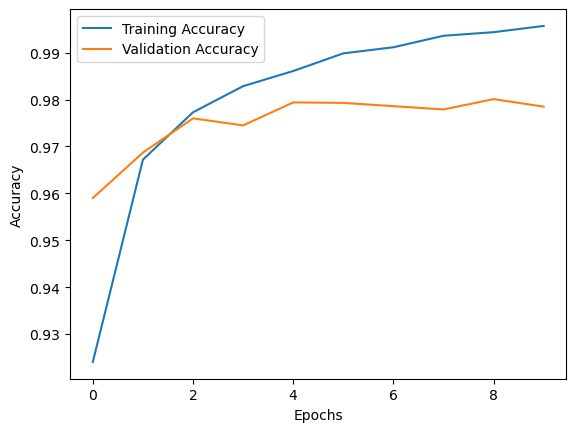

1/1 [==============================] - 0s 29ms/step


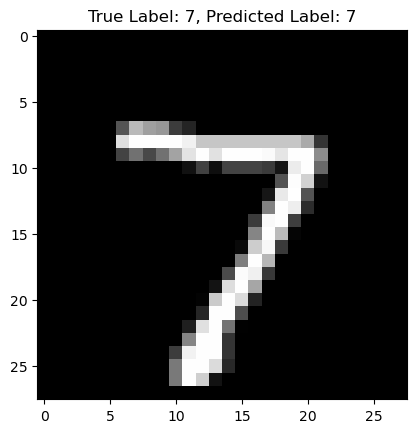

In [4]:
# 1. 项目目标
# 实现一个简单的神经网络，用于训练和测试 MNIST 手写数字数据集，完成数字 0-9 的分类任务。

# 2. 实现步骤
# 以下是完整的步骤，你可以逐步完成：

# Step 1: 设置环境
# 确保你安装了以下工具：

# Python 3.7+
# 常用库：
# numpy
# matplotlib（用于可视化）
# 深度学习框架：
# TensorFlow/Keras 或 PyTorch
# Step 2: 加载数据集
# python
# Copy code
# TensorFlow 示例
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# 加载数据
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 数据归一化，将像素值从 [0, 255] 映射到 [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 将每张图片展平为一维向量
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# 将标签转换为 one-hot 编码
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# Step 3: 构建神经网络模型
# python
# Copy code
# TensorFlow 示例
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 构建简单的前馈神经网络
model = Sequential([
    Dense(128, activation='relu', input_shape=(28 * 28,)),  # 隐藏层
    Dense(10, activation='softmax')  # 输出层
])

# 编译模型
model.compile(
    optimizer='adam',               # 优化器
    loss='categorical_crossentropy', # 损失函数
    metrics=['accuracy']            # 评估指标
)
# Step 4: 训练模型
# python
# Copy code
# 训练模型
history = model.fit(
    x_train, y_train,
    epochs=10,                 # 训练轮数
    batch_size=32,             # 每批训练样本数
    validation_data=(x_test, y_test)  # 验证集
)
# Step 5: 评估模型
# python
# Copy code
# 在测试集上评估模型
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")
# Step 6: 可视化训练过程
# python
# Copy code
import matplotlib.pyplot as plt

# 绘制训练过程的损失和准确率曲线
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Step 7: 测试预测
# python
# Copy code
# # 测试模型的预测能力
import numpy as np

# 从测试集中选取一张图片
sample_image = x_test[0].reshape(1, 28 * 28)
true_label = np.argmax(y_test[0])

# 预测
predicted_label = np.argmax(model.predict(sample_image))

# 可视化
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
plt.show()
# 3. 下一步目标
# 模型优化：

# 尝试调整网络结构（如添加隐藏层或改变神经元数量）。
# 修改学习率或优化器，观察训练效果的变化。
# 学习理论：

# 在实现过程中，记录你对激活函数、损失函数和优化器的疑问，带着问题回头学习理论。
# 错误分析：

# 查看模型预测错误的样本，分析原因（如训练数据不足、模型过拟合等）。